# Predicting heart disease using ML 

This notebook looks into using various Python-based ML and data science libraries in an attempt to build a ML model capable of prediciting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach: 
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition 

In a statement, 
> Given clinical parameters about a patient can we predict whether ot not they have a heart disease.

## 2. Data 
The og data came from the Cleveland daa from the UCI ML repository.
https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on kaggle: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation 

> If we ca reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features 

**Create Data Dictionary**

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* gbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute
icted attribute


## Preparing the tools 

We're going to use Pandas, Matplotlib and NumPy for data analysis and manipulation. 

In [97]:
#Import all the tools we need 

#Regular EDA (exploratory data analysis) and plotting libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#we want our plots to appear insdie the notebook 
%matplotlib inline 

#Models from sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve

## Load data

In [7]:
df = pd.read_csv("heart-disease.csv")
df.shape #(rows, columns)

(303, 14)

## Data exploration (exploratory data analysis or EDA) - get familiar to data

The goal here is to find out more about the data and to become a subject matter expert on the dataset you're working with. 

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data? 

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
#Let's find out how many of each class there are 
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

we can tell that this is a relatively balanced problem, since value counts are almost same.

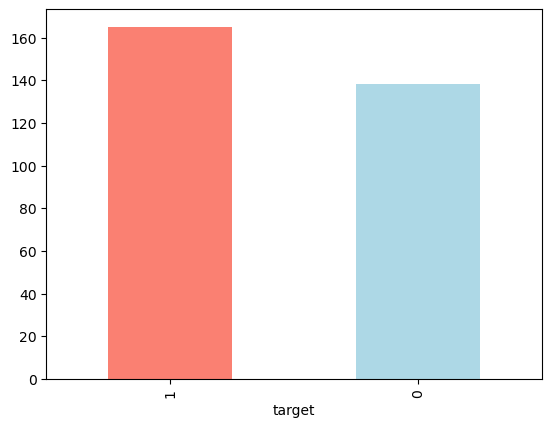

In [11]:
df["target"].value_counts().plot(kind="bar", color=["salmon", 'lightblue']);

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
#are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.describe() #numerical info about our columns 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex 
(comparing the sex and target attribute)

In [17]:
df['sex'].value_counts()
#male=1, female=0

sex
1    207
0     96
Name: count, dtype: int64

In [18]:
# COmpare target col with sex col 
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


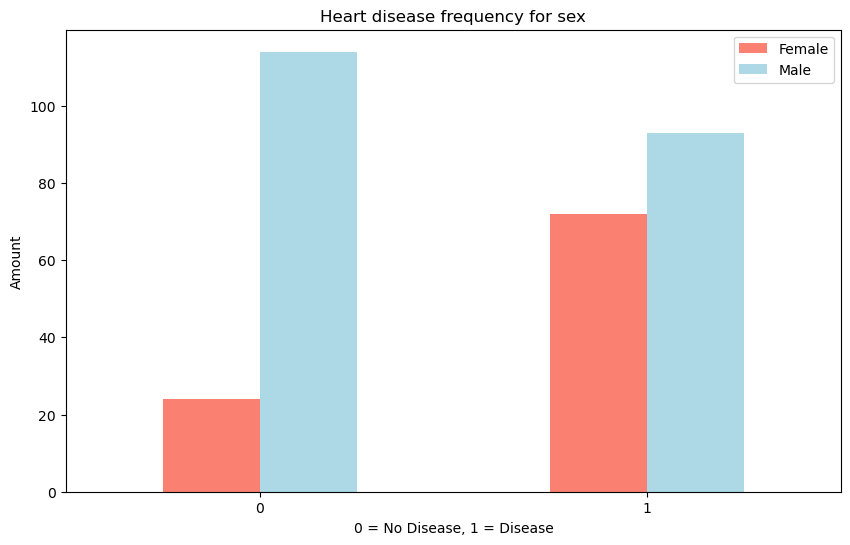

In [25]:
#Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=['salmon', 'lightblue']);
plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Age vs Max Heart Rate for heart disease

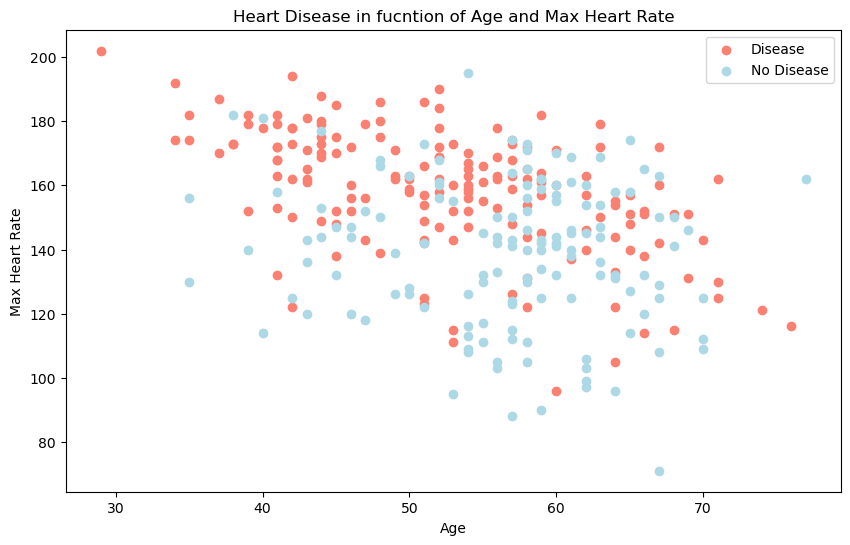

In [37]:
#Create another figure 
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

#Scatter with negative examples 
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

#add some helpful info 
plt.title("Heart Disease in fucntion of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

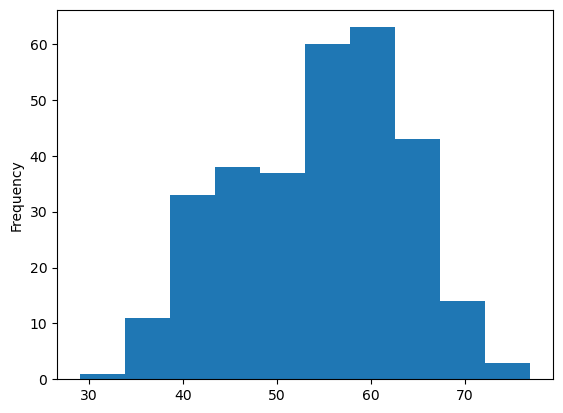

In [39]:
# Check the distribution of the age column with a histogram 
df.age.plot.hist();

- Histograms help with detecting outliers
- We can also observe the number of patients of each age group with the histogram above.

### Heart Disease Frequency per Chest Pain Type 

cp - chest pain type 

* 0: typical angina
* 1: atypical angina
* 2: non-anginal
* 3: asymptomatic

In [41]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


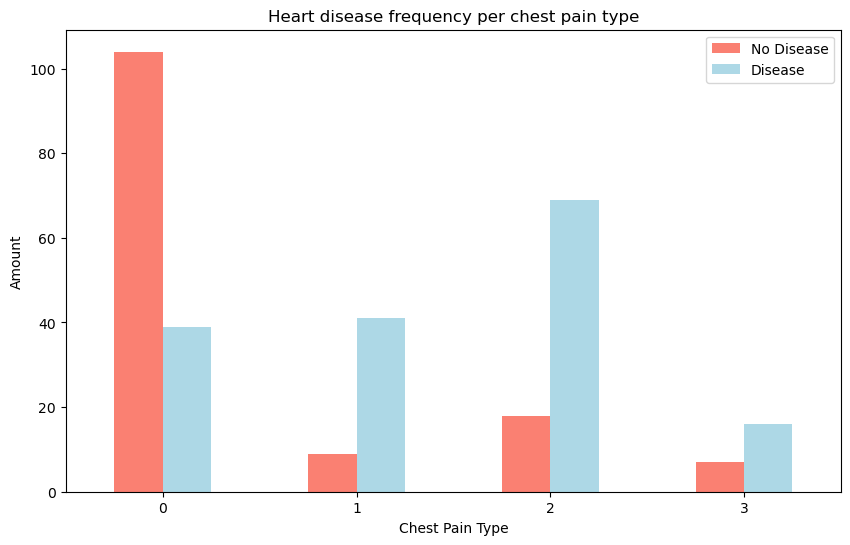

In [44]:
#Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon", 'lightblue'])
#add some communication 
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [45]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
# Make a correlation matrix 
df.corr() #compare each othese columns to each other 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


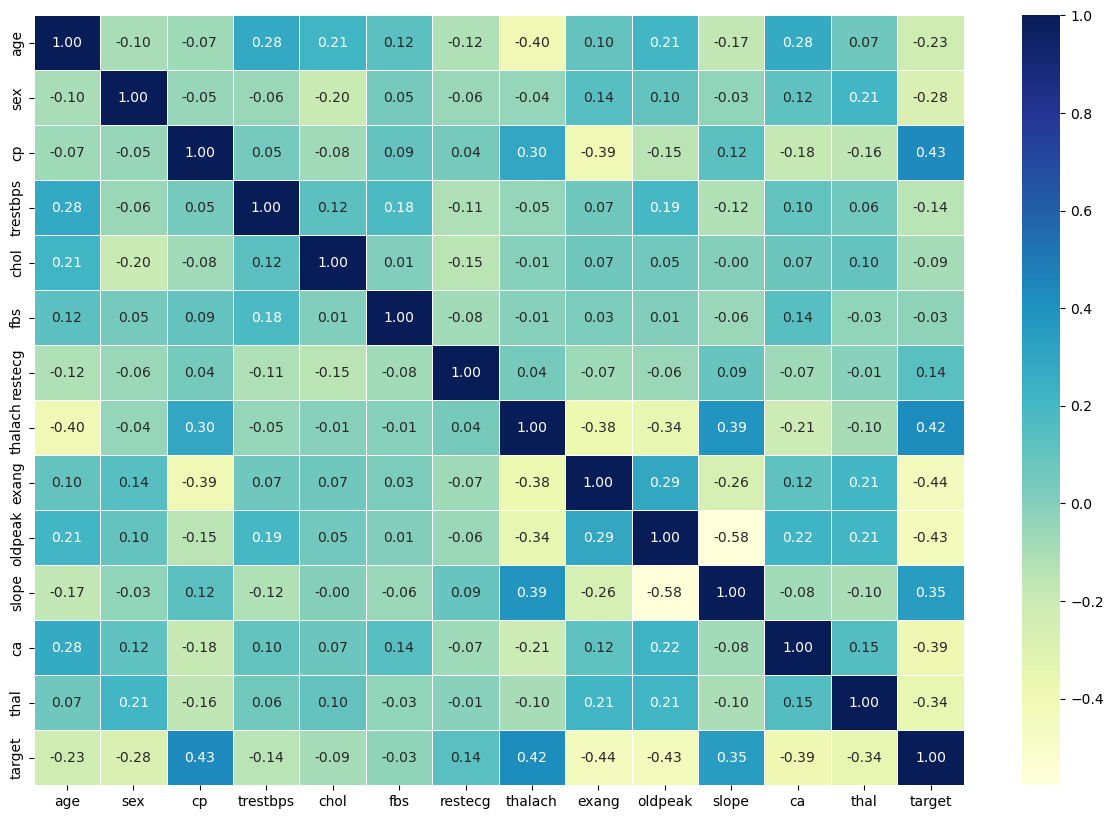

In [50]:
#Let's make out correlation matrix a little prettier 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt='.2f',
              cmap='YlGnBu');
#bottom, top = ax.get_ylim() 
#ax.set_ylim(bottom+0.5, top-0.5) - to adjust axes limits so everything is aligned 

Usually - A higher positive value means a potential positive correlation, and a higher negative value means a potential negative correlation or a decrease. (check the box which is common to cp and target for the value in mention)

Meaning: 
* for eg. as cp goes up, the target value also increases (this is positive correlation - directly proportional)

* Negative correlation: a relationship between two variables in which one variable increases as the other decreases. 
eg. exang and target, strangely enough acc to the correlation (-0.44) we can say that if someone gets chest pain during exercise (exang=1) their chance of having heart disease goes down (target=0).

* eg. fbs vs target, corr = -0.03 (close to 0) -> no correlation between fbs and target, no negative or positive corr, it just kind of is what it is. 

### 5. Modelling

In [51]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
#split data into X and y 
X = df.drop("target", axis=1)
y = df["target"]

In [53]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [54]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [55]:
#Split data into train and test sets 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [56]:
X_train.head() #gets shuffled 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [57]:
y_train.head(), len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
 Name: target, dtype: int64,
 242)

Now we've got our data split into training and test sets, it's time to build a ML model.

We'll train it (find patterns on the training set)

And we'll test it (use the patterns) on the test set

We're going to try 3 diff Ml models:
1. Logistic Regression (is a classification model regardless of its name!)
2. K-Nearest Neignbors Classifier
3. Random Forest Classifier 

In [61]:
# Put models in a dictionary 
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#Create a fucntion to fit and score the models 
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given ML models. 
    models: a dict of different Scikit-Learn machine learnign models 
    X_train : training data (no labels)
    X_test : testing data(no labels)
    y_train : training labels 
    y_test : test labels 
    """
    #Set random seed
    np.random.seed(42)
    #Make a dict to keep model scores 
    model_scores = {}
    #Loop through models 
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test) #add item to dict
    return model_scores

In [62]:
model_scores = fit_and_score(models=models,
                            X_train=X_train, 
                            X_test=X_test, 
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\Users\Prach\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

<Axes: >

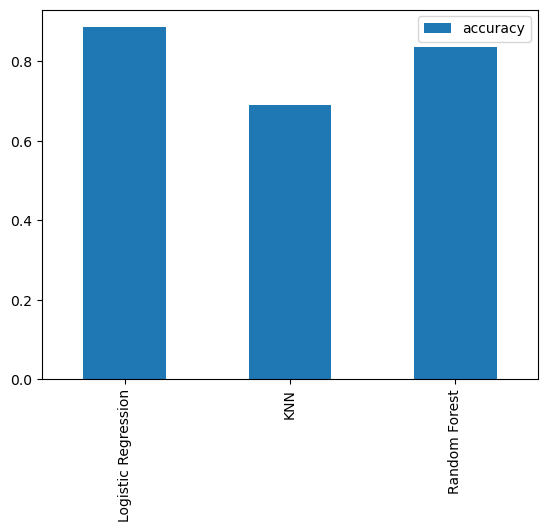

In [65]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

Now we've got a baseline model... and we know that a model's first predictions aren't always what we should base our next steps off. What should we do? 

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning (by hand)

In [67]:
#Let's tune KNN

train_scores=[]
test_scores=[]

#Create a list of diff values for n_neighbors 
neighbors = range(1,21)

#Setup KNN instance 
knn = KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #Fit the algorithm
    knn.fit(X_train, y_train)

    #Update the training scores list 
    train_scores.append(knn.score(X_train, y_train))

    #Update the test scores list 
    test_scores.append(knn.score(X_test, y_test))

In [68]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [70]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


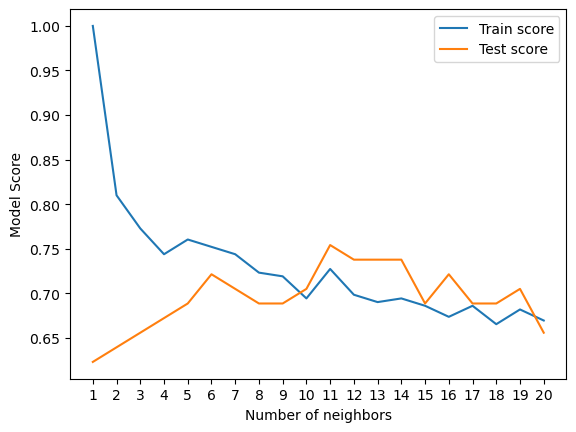

In [74]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Discarding KNN now, since even after hyperparameter tuning it does worse than LogisticRegression and RFC

## Hyperparameter tuning with RandomizedSearchCV 

We're going to tune:
1. LogisticRegression()
2. RandomForestClassifer()

...using RandomizedSearchCV 

In [76]:
#Create a hyperparameter grid for LogisticRegression
log_reg_grid={"C" : np.logspace(-4,4,20),
              "solver": ['liblinear']}

#use a range of values as paramaters instead of defining explicit values in lists
#like how we use np.logspace and np.arange -> good 

#Create hyperparameter grid for RFC
rf_grid = {'n_estimators':np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}


Now we've got hyperparameter grids setup for each of our models, let's tune them using RSCV...

In [79]:
# Tune LogisticRegression 

np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression (rs=random search)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit random hyperparameter search model for LogReg
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [80]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [82]:
rs_log_reg.score(X_test, y_test)
#we got the same result as before 

0.8852459016393442

Now we've tuned LogisticRegression(), lets do the same for RFC()

In [83]:
#Setup random seed
np.random.seed(42)

#Setup random hyperparameter search for RFC
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

#Fit random hyperparameter search model for RFC()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [84]:
# Find the best hyperparameters 
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [85]:
#Evaluate the randomized search RFC model
rs_rf.score(X_test, y_test)
#we got a little improvement! 

0.8688524590163934

In [86]:
model_scores #original scores 

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Discarding our RFC model, since after tuning it still isn't as efficient as our LogReg model. 

Observe the process of elimiation we are following, we eliminated KNN by tuning hyperparams by hand, then RFC by RSCV and now we're left to work on LogReg (with GSCV)! 

## Hyperparameter Tuning with GridSearchCV

Since our LogReg model provieds the best scores so afr, we'll try and improve them again usign GSCV...

In [87]:
#Different hyperparameters for our LogReg model 
log_reg_grid = {"C":np.logspace(-4.4,30),
               "solver":["liblinear"]}

#Setup grid hyperparameter search for LogReg
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

#Fit grid hyperparameter search model 
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([3.98107171e-05, 2.00466042e-04, 1.00944261e-03, 5.08302738e-03,
       2.55954792e-02, 1.28885506e-01, 6.49000301e-01, 3.26802759e+00,
       1.64560853e+01, 8.28642773e+01, 4.17261354e+02, 2.10111092e+03,
       1.05801006e+04, 5.32758776e+04, 2.68269580e+05, 1.35086592e+06,
       6.80225739e+06, 3.42526264e+07, 1.724783...
       1.80776868e+15, 9.10298178e+15, 4.58378765e+16, 2.30815679e+17,
       1.16226758e+18, 5.85257434e+18, 2.94705170e+19, 1.48398179e+20,
       7.47255960e+20, 3.76279193e+21, 1.89474609e+22, 9.54095476e+22,
       4.80432804e+23, 2.41920945e+24, 1.21818791e+25, 6.13416003e+25,
       3.08884360e+26, 1.55538080e+27, 7.83208787e+27, 3.94383164e+28,
       1.98590827e+29, 1.00000000e+30]),
                         'solver': ['liblinear']},
             verbose=True)

In [88]:
#Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.12888550621582087, 'solver': 'liblinear'}

In [89]:
#Evaluate the grid search LogReg model
gs_log_reg.score(X_test, y_test)
#we get the same score we obtained originally and with RSCV! 

0.8852459016393442

## Evaluating our tuned ML classifier, beyond accuracy 

* ROC curve
* Confusion report
* Preicison
* Recall
* F1-score

...and it would be great if cross-validation was used where possible. 

To make comparisons and evaluate our training model, first we need to make predictions. 

In [91]:
#Make preds with tuned model
y_preds = gs_log_reg.predict(X_test)

In [92]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [93]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [ ]:
y_preds_proba = 

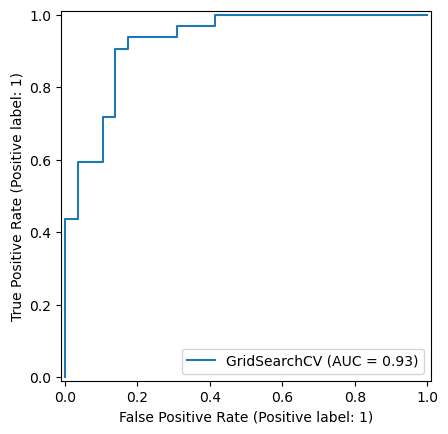

In [99]:
#Plot ROC curve and calculate and AUC metric 
#from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test); 

In [107]:
#Confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
type(conf_mat)

numpy.ndarray

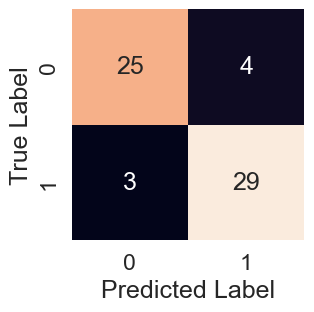

In [108]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score 

In [110]:
print(classification_report(y_test, y_preds))
#these metrics are calculated only on one split -> X_test, i.e. without any cross-validation

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation 

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and we'll do so by using `cross_val_score()` 

In [111]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.12888550621582087, 'solver': 'liblinear'}

In [112]:
#Create a new classifier with best params 
clf = LogisticRegression(C = 0.12888550621582087, 
                         solver = "liblinear")

In [113]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.83606557, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [116]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [118]:
# Cross-validated precision 
cv_prec = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_prec=np.mean(cv_prec)
cv_prec

0.8218912117692605

In [119]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9272727272727274

In [120]:
# Cross-validated f1
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.870410756901315

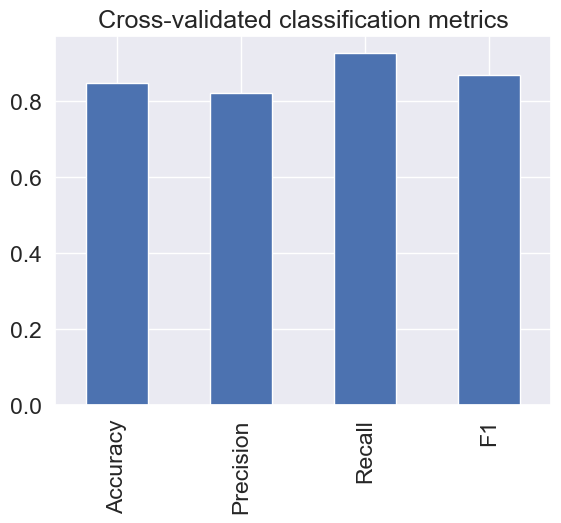

In [125]:
#Visualize our cross-validated metrics 
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_prec,
                          "Recall":cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False);

### Feature Importance

Feature importance is another way of asking, "which features contributer most to the outcome of the model and how did they contribute?" 

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance". 

Let's find the feature importandce for our Logistic Regression Model...

In [131]:
#Fit an instance of LogisticRegression
clf = LogisticRegression(C = 0.12888550621582087, 
                         solver = 'liblinear')
clf.fit(X_train, y_train);

In [133]:
#Check coef_
clf.coef_ #tells us how each of the independent variables (X_train features) contribute to our target labels (y_train avalues)

array([[ 0.00102054, -0.70383405,  0.60995388, -0.01153809, -0.00153157,
         0.02709786,  0.24591531,  0.02410569, -0.50717685, -0.53829247,
         0.37915795, -0.58046883, -0.59693499]])

In [134]:
# Match coef's of features to columns 
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0010205378263850103,
 'sex': -0.7038340475205488,
 'cp': 0.6099538760617211,
 'trestbps': -0.011538089277868578,
 'chol': -0.0015315707676946482,
 'fbs': 0.02709786419362552,
 'restecg': 0.24591531097893388,
 'thalach': 0.024105692201121503,
 'exang': -0.5071768519767541,
 'oldpeak': -0.5382924748885513,
 'slope': 0.37915794584371315,
 'ca': -0.5804688278803486,
 'thal': -0.596934991652319}

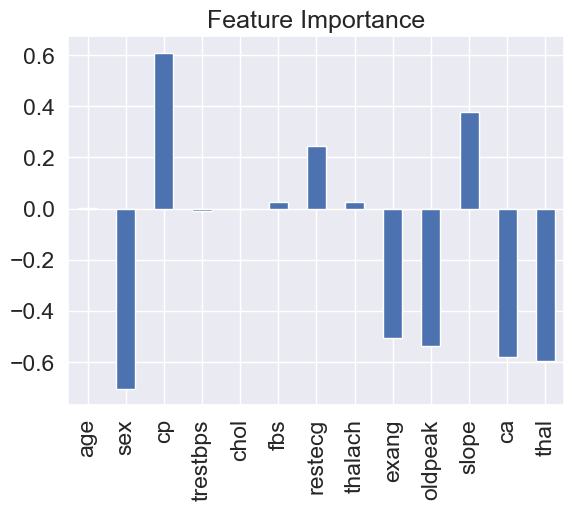

In [136]:
#Visualise feature importance 
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

similar to correlation matrix! 

In [137]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


acc to the graph, sex and target are negatively correlated, i.e. one increases as the other decreases.   

acc to the crosstab we can see that the ratio between the target classes 0 and 1 goes down (from 1:3 to almost 1:1) as the sex value goes up (0 to 1, female to male)

In [138]:
pd.crosstab(df["slope"], df["target"]) #positively correlated 

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

here, we can see as slope increases, the target value would increase i.e, 0 to 1, i.e. likely to have heart disease! positively correlated. 

## 6. Experimentation
If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric how would you export it and share it with others?)